<a href="https://colab.research.google.com/github/drpetros11111/IBM_ML_Coursera/blob/Decision_Trees/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Foundation

## Course 3, Part d: Decision Tree LAB

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

In [36]:
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
#os.chdir('data')
#from colorsetup import colors, palette
#sns.set_palette(palette)

## Import the Data

* Import the data and examine the features.
* We will be using all of them to predict `color` (white or red), but the colors feature will need to be integer encoded.

In [37]:
filepath = '/content/Wine_Quality_Data.csv'
data = pd.read_csv(filepath, sep=',')

In [38]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [39]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

Convert the color feature to an integer. This is a quick way to do it using Pandas.

In [40]:
data['color'] = data.color.replace('white',0).replace('red',1).astype(np.int)

<ipython-input-40-8c7028e59887>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['color'] = data.color.replace('white',0).replace('red',1).astype(np.int)


**data['color'] = data.color.replace('white', 0).replace('red', 1).astype(np.int)**

performs transformations on the 'color' column of the DataFrame data. Let's break it down step by step:


---


**data['color']**

selects the 'color' column from the DataFrame data.


---


**replace('white', 0)**

replaces all occurrences of the string 'white' in the 'color' column with the value 0. This is done using the replace() method of pandas Series.


---


**replace('red', 1)**

replaces all occurrences of the string 'red' in the 'color' column (after the previous replacement) with the value 1. This updates the 'color' column further.


---


**astype(np.int)**

converts the data type of the 'color' column to int. This ensures that the 'color' column contains integer values.

**In summary, the code replaces specific string values in the 'color' column with corresponding numeric values and converts the data type of the column to int. **

This can be useful when transforming categorical data into numerical representation for further analysis or modeling purposes.

## Split the Data

* Use `StratifiedShuffleSplit` to split data into train and test sets that are stratified by wine quality. If possible, preserve the indices of the split for question 5 below.
* Check the percent composition of each quality level for both the train and test data sets.

##StratifiedShuffleSplit performs stratified sampling

**To create train and test sets while preserving the class proportions in the target variable.** The sampling process involves the following steps:


---


---



**Determining the class proportions**

The class proportions in the target variable are computed to understand the distribution of the different classes. This information is crucial for stratified sampling.


---


**Shuffling the data**

The data is randomly shuffled while keeping the class labels associated with each sample intact. Shuffling ensures that the samples are not ordered in any specific way that could bias the splitting process.


---


**Splitting into train and test sets**

The shuffled data is divided into train and test sets based on the specified test_size parameter or the absolute number of samples if test_size is an integer. The splitting is done in such a way that the class proportions in the target variable are maintained in both the train and test sets.


---


**Repeating the process**

The above steps are repeated for the specified number of splits (n_splits). Each iteration generates a different random split of the data, ensuring that different samples are included in the train and test sets.


---


---



By employing stratified sampling, StratifiedShuffleSplit addresses the issue of imbalanced datasets or datasets with uneven class distributions.

It ensures that the resulting train and test sets have similar class proportions as the original dataset, allowing for a more representative evaluation of the model's performance.

This stratified sampling approach is particularly useful in scenarios where each class in the target variable has different levels of representation and the goal is to create train and test sets that accurately reflect the underlying class distribution.

In [41]:
# All data columns except for color
feature_cols = [x for x in data.columns if x not in 'color']

The line

**feature_cols = [x for x in data.columns if x not in 'color']**

**creates a list of column names from the DataFrame data excluding the column named 'color'.**

Let's break down the line and understand how it works:

**data.columns**
retrieves the column names of the DataFrame data.

It returns a pandas Index object containing the column names.

The list comprehension

**[x for x in data.columns if x not in 'color']**

iterates over each element (x) in data.columns and checks if it is not equal to the string 'color'.

**If the condition is true, the element is included in the resulting list (feature_cols)**.

**In summary, the line of code creates a list (feature_cols) containing all the column names from the DataFrame data except for the column named 'color'.**

It allows you to select a subset of columns for further processing or analysis by excluding the specified column.

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit

# Split the data into two parts with 1000 points in the test data
# This creates a generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=1000, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data['color']))

# Create the data sets
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'color']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'color']

###Split the data into two parts with 1000 points in the test data
### This creates a generator

The line of code

**strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=1000, random_state=42)**

creates an instance of the StratifiedShuffleSplit class with the following parameters:


---


**n_splits**
The number of splits to generate. In this case, it is set to 1, meaning that only one split will be created.


---


**test_size**

The size of the test set. It can be specified as an absolute number or as a fraction of the total dataset size. In this case, it is set to 1000, indicating that the test set will contain 1000 samples.


---



**random_state**

The seed for the random number generator. It ensures reproducibility of the splits. By setting it to 42, the same splits will be generated if the code is run multiple times with the same parameters'''



---


---
### Get the index values from the generator

In the line of code

**train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data['color'])),**

the split() method of the strat_shuff_split instance is called to generate the train and test indices for stratified shuffling of the data.Let's break down this line and understand what it does:



---



**data[feature_cols]**

selects the subset of columns from the DataFrame data that are specified by feature_cols. These columns are the features that will be used for training and testing.



---



**data['color']**

selects the target variable column ('color') from the DataFrame data. This is the variable that you want to predict or classify.



---



**strat_shuff_split.split(data[feature_cols], data['color'])**

calls the split() method of the strat_shuff_split instance to generate the stratified train and test indices based on the features and target variable provided.



---



**next()**

is used to retrieve the next item from the iterator returned by split(). Since n_splits is set to 1 in your strat_shuff_split instance, there is only one split available.

The returned train and test indices are assigned to train_idx and test_idx, respectively.

**These indices represent the positions of the data points that belong to the train and test sets.**

After executing this line of code, you will have the train and test indices ready for further use in your data analysis or modeling pipeline.



---



---


---
### Create the data sets

**X_train = data.loc[train_idx, feature_cols]**

selects the rows specified by the train_idx from the DataFrame data using loc[] and retrieves the columns specified by feature_cols. This assigns the selected feature data for the training set to the variable X_train.


---


**y_train = data.loc[train_idx, 'color']**

selects the rows specified by the train_idx from the DataFrame data using loc[] and retrieves the target variable column 'color'. This assigns the selected target variable data for the training set to the variable y_train.


---


**X_test = data.loc[test_idx, feature_cols]**

selects the rows specified by the test_idx from the DataFrame data using loc[] and retrieves the columns specified by feature_cols. This assigns the selected feature data for the test set to the variable X_test.



---



**y_test = data.loc[test_idx, 'color']**

selects the rows specified by the test_idx from the DataFrame data using loc[] and retrieves the target variable column 'color'. This assigns the selected target variable data for the test set to the variable y_test.

**After executing this code, you will have the feature and target variable data split into training and test sets (X_train, y_train, X_test, y_test). These sets are ready to be used for model training and evaluation, allowing you to train a model on the training data (X_train, y_train) and assess its performance on the test data (X_test, y_test)**




Now check the percent composition of each quality level in the train and test data sets. The data set is mostly white wine, as can be seen below.

In [43]:
y_train.value_counts(normalize=True).sort_index()

0    0.753866
1    0.246134
Name: color, dtype: float64

The code

**y_train.value_counts(normalize=True).sort_index()**

computes the normalized value counts of each unique value in the y_train variable and sorts them by the index (in ascending order).
Let's break down the code and understand its purpose:



---



**y_train.value_counts()**

counts the number of occurrences of each unique value in the y_train variable. It returns a Series where the unique values are the index and the corresponding counts are the values.


---


**normalize=True**

is an argument passed to value_counts() that normalizes the counts by dividing them by the total number of samples. This provides the proportions or relative frequencies of each unique value.


---


**sort_index()**

sorts the resulting Series by the index (unique values in y_train) in ascending order.

**The output of this code will be a Series where the unique values in y_train are the index, and the values represent the normalized proportions or relative frequencies of each unique value. The Series will be sorted by the index in ascending order.**

This code is useful to get insights into the distribution or class proportions of the target variable in the training set. It allows you to understand the relative frequencies of different classes, which can be helpful when dealing with imbalanced datasets or assessing the representativeness of the training set

In [44]:
y_test.value_counts(normalize=True).sort_index()

0    0.754
1    0.246
Name: color, dtype: float64

## Fit the decision Tree classifier

* Fit a decision tree classifier with no set limits on maximum depth, features, or leaves.
* Determine how many nodes are present and what the depth of this (very large) tree is.
* Using this tree, measure the prediction error in the train and test data sets. What do you think is going on here based on the differences in prediction error?

In [45]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

The number of nodes and the maximum actual depth.

In [46]:
dt.tree_.node_count, dt.tree_.max_depth

(171, 22)

##Scikit-learn Decision Trees depth & node count

In scikit-learn's decision tree implementation, you can access the number of nodes in a decision tree and its maximum depth using the attributes node_count and max_depth of the decision tree object.

Assuming dt is your decision tree object, you can retrieve these values as follows:


### Number of nodes in the decision tree
node_count = dt.tree_.node_count
print("Number of nodes:", node_count)

### Maximum depth of the decision tree
max_depth = dt.tree_.max_depth
print("Maximum depth:", max_depth)
Here's a breakdown of what these attributes represent:

###node_count
This attribute gives the total number of nodes in the decision tree, including both internal nodes and leaf nodes. Each node represents a split or decision point in the tree.

###max_depth
This attribute provides the maximum depth of the decision tree, which corresponds to the longest path from the root node to any leaf node. The depth of the tree indicates the number of splits or decisions required to reach a leaf node.


---



---


By accessing these attributes, you can gain insights into the structure and complexity of your decision tree model. The number of nodes provides an understanding of the overall size of the tree, while the maximum depth gives an indication of how deep the tree can go in terms of decision levels. These characteristics can help in assessing the interpretability, complexity, and potential overfitting of the decision tree model.

A function to return error metrics.

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

The decision tree predicts a little better on the training data than the test data, which is consistent with (mild)  overfitting. Also notice the perfect recall score for the training data. In many instances, this prediction difference is even greater than that seen here.

In [48]:
# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.999818,0.984000
precision,0.999261,0.963710
recall,1.000000,0.971545
f1,0.999631,0.967611


### Measure the error on the training and test data sets

**The code y calculates the prediction errors for both the training and test sets, and then concatenates the results into a DataFrame called train_test_full_error.** Let's break down the code to understand each step:


---


**y_train_pred = dt.predict(X_train)**

 uses the trained decision tree model dt to make predictions on the training set X_train, and assigns the predicted values to the variable y_train_pred.


---


**y_test_pred = dt.predict(X_test)**

 uses the same trained decision tree model dt to make predictions on the test set X_test, and assigns the predicted values to the variable y_test_pred.


---


**measure_error(y_train, y_train_pred, 'train')**

and

**measure_error(y_test, y_test_pred, 'test')**

are functions (not shown in the code snippet) that calculate some error or evaluation metric between the actual target values (y_train and y_test) and the corresponding predicted values (y_train_pred and y_test_pred).

These functions likely compute metrics such as accuracy, precision, recall, or mean squared error to assess the model's performance.


---


**pd.concat([measure_error(y_train, y_train_pred, 'train'), measure_error(y_test, y_test_pred, 'test')], axis=1)**

concatenates the error measurements for the training set and test set horizontally (along the columns) using pd.concat(). The resulting DataFrame is assigned to train_test_full_error.


---


The resulting train_test_full_error DataFrame will have the error metrics for the training set and test set side by side, with one row per error metric.

This allows you to compare the performance of the model on the training and test sets in a tabular format. The exact structure and content of the train_test_full_error DataFrame will depend on the specific implementation of the measure_error() function.

## Perform Grid Search

* Using grid search with cross validationgrid search with cross validation,, find a decision tree that performs well on the test data set. Use a different variable name for this decision tree model than in question 3 so that both can be used in question 6.
* Determine the number of nodes and the depth of this tree.
* Measure the errors on the training and test sets as before and compare them to those from the tree in question 3.

**GridSearchCV is imported from sklearn.model_selection**.

It is a class that performs an exhaustive search over a specified hyperparameter grid.


---


The param_grid dictionary defines the hyperparameters and their corresponding values to be explored.

In this case:

**max_depth is set to a range of values from 1 to the maximum depth of the given decision tree (dt.tree_.max_depth) with a step size of 2. max_features is set to a range from 1 to the total number of features (len(dt.feature_importances_)).**


---


**GR is initialized as a GridSearchCV object**

The base estimator is set as DecisionTreeClassifier with random_state=42, which ensures reproducibility.


---


**scoring='accuracy'**

specifies the scoring metric to evaluate the performance of the models during the grid search. In this case, it uses accuracy as the evaluation metric.

---





**n_jobs=-1**

allows parallel computation using all available processors.


---


The

**GridSearchCV object GR**

is fitted to the training data (X_train and y_train) using the .fit() method.

After the GridSearchCV fitting process is completed, you can access various attributes of GR, such as best_params_ to obtain the best hyperparameters found during the search and best_score_ to obtain the corresponding best score achieved.


In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

### Grid Search with Cross-validation technique

**Grid search with cross-validation is a technique used to find the optimal hyperparameters for a machine learning model by exhaustively searching through a specified set of hyperparameter values. Cross-validation is used to evaluate the performance of the model with each set of hyperparameters**.

Here's an overview of how to perform grid search with cross-validation:



---



**Define the model**

Choose the machine learning model you want to use and instantiate it with default hyperparameter values or initial values of your choice.


---


**Define the parameter grid**

Specify the hyperparameters you want to tune and the corresponding values you want to search over. This can be done using a dictionary or a list of dictionaries, where each dictionary contains the hyperparameter name as the key and a list of possible values as the value.


---


**Create the grid search object**

Use the GridSearchCV class from scikit-learn to create a grid search object.

Pass the model, parameter grid, and the desired number of cross-validation folds (cv) as parameters to the GridSearchCV constructor.


---


**Fit the grid search object**

Call the fit() method of the grid search object, passing in the training data (X_train, y_train) to perform the grid search with cross-validation.

**This will exhaustively search through all the hyperparameter combinations and evaluate the model's performance using cross-validation.**


---


**Access the results**

After the grid search is complete, you can access various attributes of the grid search object to analyze the results. This includes attributes such as best_params_, best_score_, and cv_results_, which provide information about the best hyperparameters, the corresponding best score, and detailed results of each hyperparameter combination's performance during cross-validation.



---



---


---




**GridSearchCV is imported from sklearn.model_selection.**

It is a class that performs an exhaustive search over a specified hyperparameter grid.


---



---


**The param_grid dictionary**

defines the hyperparameters and their corresponding values to be explored.


---


In this case,

**max_depth is set to a range of values from 1 to the maximum depth of the given decision tree (dt.tree_.max_depth) with a step size of 2.**

**max_features is set to a range from 1 to the total number of features (len(dt.feature_importances_)).**

**range(1, dt.tree_.max_depth+1, 2)**

This part creates a range of values for max_depth starting from 1 and incrementing by 2 until dt.tree_.max_depth+1.

To understand this better, let's assume that
dt.tree_.max_depth is equal to 5 (the maximum depth of the decision tree).

The range(1, dt.tree_.max_depth+1, 2) expression will generate the following sequence: [1, 3, 5].
These values represent the potential values for the max_depth hyperparameter that GridSearchCV will explore during the grid search process.


The max_depth hyperparameter determines the maximum depth of the decision tree, limiting the number of splits or decision levels.


By using this parameter grid, GridSearchCV will fit and evaluate multiple decision tree models with different values of max_depth (in this case, 1, 3, and 5).

It will determine the best value of max_depth based on the specified scoring metric (accuracy in this case) and the performance on the provided training data.


---


**GR is initialized as a GridSearchCV object.**


---


The base estimator is set as DecisionTreeClassifier with random_state=42, which ensures reproducibility.


---


**scoring='accuracy'**

specifies the scoring metric to evaluate the performance of the models during the grid search. In this case, it uses accuracy as the evaluation metric.


---


**n_jobs=-1**`

allows parallel computation using all available processors.


---


The GridSearchCV object GR is fitted to the training data (X_train and y_train) using the .fit() method.


---


After the GridSearchCV fitting process is completed, you can access various attributes of GR, such as best_params_ to obtain the best hyperparameters found during the search and best_score_ to obtain the corresponding best score achieved.

The number of nodes and the maximum depth of the tree.

In [50]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(99, 7)

In [51]:
best_params = GR.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 7, 'max_features': 9}


**In the example above, GR is the GridSearchCV object that has been fitted to the training data. The best_params_ attribute is accessed to retrieve the dictionary of the best hyperparameters.**

You can then print or inspect best_params to review the best hyperparameter values found by the grid search.

Note that the best_params_ attribute will include all the hyperparameters that were specified in the param_grid during the grid search, along with their corresponding best values.

Additionally, you can also access other useful attributes of the GridSearchCV object, such as best_score_ (the best score achieved during the grid search) and cv_results_ (a dictionary containing detailed information about all the evaluated hyperparameter combinations and their scores). These attributes provide further insights into the performance and results of the grid search.

These test errors are a little better than the previous ones. So it would seem the previous example overfit the data, but only slightly so.

In [54]:
# Get the best decision tree model from GridSearchCV
best_dt_model = GR.best_estimator_

# Get the feature importances
feature_importances = best_dt_model.feature_importances_

# Create a list of tuples (feature, importance)
feature_importance_list = list(zip(X_train.columns, feature_importances))

# Sort the list by importance (in descending order)
feature_importance_list.sort(key=lambda x: x[1], reverse=True)

# Print the features and their importance values
print("Feature Importance:")
for feature, importance in feature_importance_list:
    print(f"{feature}: {importance}")


Feature Importance:
chlorides: 0.6491974948277066
total_sulfur_dioxide: 0.21665112044354956
fixed_acidity: 0.031130378570835508
volatile_acidity: 0.0307906833273487
density: 0.029136628120758786
sulphates: 0.017447217175956375
pH: 0.015389440570853851
alcohol: 0.003439016668939919
free_sulfur_dioxide: 0.002561186674491211
residual_sugar: 0.002450396964865831
citric_acid: 0.0018064366546936947
quality: 0.0


**The numbers provided in the feature importance list are not R-squared values.**

R-squared (coefficient of determination) is a metric that measures the goodness of fit of a regression model and represents the proportion of the variance in the dependent variable that can be explained by the independent variables.

**The feature importance values you see are specific to the feature selection algorithm or technique used (such as decision trees) and represent the relative importance or contribution of each feature in the model. These values are not directly related to R-squared.**

Feature importance values indicate how much each feature influences the model's predictions or target variable. The higher the importance value, the more influential the feature is in making predictions or explaining the target variable. These values provide insights into the relative significance of the features within the context of the specific algorithm and dataset.

While both R-squared and feature importance are useful in model analysis, they capture different aspects. R-squared measures the overall fit of a regression model, while feature importance focuses on the relative importance of individual features within a model.

In [55]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [56]:
train_test_gr_error

,train,test
accuracy,0.995816,0.989000
precision,0.998501,0.983539
recall,0.984479,0.971545
f1,0.991440,0.977505


## Re-split the Data

* Re-split the data into `X` and `y` parts, this time with `residual_sugar` being the predicted (`y`) data. *Note:* if the indices were preserved from the `StratifiedShuffleSplit` output in question 2, they can be used again to split the data.
* Using grid search with cross validation, find a decision tree **regression** model that performs well on the test data set.
* Measure the errors on the training and test sets using mean squared error.
* Make a plot of actual *vs* predicted residual sugar.

In [57]:
### BEGIN SOLUTION
feature_cols = [x for x in data.columns if x != 'residual_sugar']

# Create the data sets
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'residual_sugar']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'residual_sugar']

In [58]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor().fit(X_train, y_train)

param_grid = {'max_depth':range(1, dr.tree_.max_depth+1, 2),
              'max_features': range(1, len(dr.feature_importances_)+1)}

GR_sugar = GridSearchCV(DecisionTreeRegressor(random_state=42),
                     param_grid=param_grid,
                     scoring='neg_mean_squared_error',
                      n_jobs=-1)

GR_sugar = GR_sugar.fit(X_train, y_train)

The number of nodes and the maximum depth of the tree. This tree has lots of nodes, which is not so surprising given the continuous data.

In [59]:
GR_sugar.best_estimator_.tree_.node_count, GR_sugar.best_estimator_.tree_.max_depth

(7953, 25)

The error on train and test data sets. Since this is continuous, we will use mean squared error.

In [60]:
from sklearn.metrics import mean_squared_error

y_train_pred_gr_sugar = GR_sugar.predict(X_train)
y_test_pred_gr_sugar  = GR_sugar.predict(X_test)

train_test_gr_sugar_error = pd.Series({'train': mean_squared_error(y_train, y_train_pred_gr_sugar),
                                         'test':  mean_squared_error(y_test, y_test_pred_gr_sugar)},
                                          name='MSE').to_frame().T

train_test_gr_sugar_error

,train,test
MSE,0.00055,2.659874


A plot of actual vs predicted residual sugar.

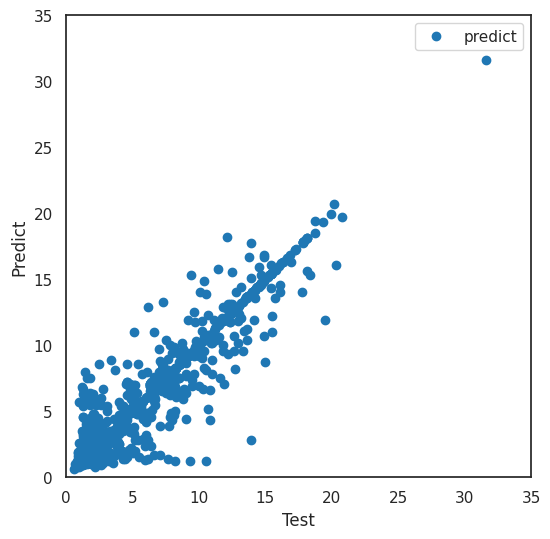

In [61]:
sns.set_context('notebook')
sns.set_style('white')
fig = plt.figure(figsize=(6,6))
ax = plt.axes()

ph_test_predict = pd.DataFrame({'test':y_test.values,
                                'predict': y_test_pred_gr_sugar}).set_index('test').sort_index()

ph_test_predict.plot(marker='o', ls='', ax=ax)
ax.set(xlabel='Test', ylabel='Predict', xlim=(0,35), ylim=(0,35));

## Question 6

This question requires an additional command line program (GraphViz) and Python library (PyDotPlus). GraphViz can be installed with a package manager on Linux and Mac. For PyDotPlus, either `pip` or `conda` (`conda install -c conda-forge pydotplus`) can be used to install the library.

Once these programs are installed:

* Create a visualization of the decision tree from question 3, where wine color was predicted and the number of features and/or splits are not limited.
* Create a visualization of the decision tree from question 4, where wine color was predicted but a grid search was used to find the optimal depth and number of features.

The decision tree from question 5 will likely have too many nodes to visualize.

In [ ]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

The tree from question 3.

In [ ]:
### BEGIN SOLUTION
# Create an output destination for the file
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'wine_tree.png'
graph.write_png(filename)
Image(filename=filename)

The tree fit with cross validation from question 4. This tree is much shallower than the previous one.

In [ ]:
# Create an output destination for the file
dot_data = StringIO()

export_graphviz(GR.best_estimator_, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'wine_tree_prune.png'
graph.write_png(filename)
Image(filename=filename)
### END SOLUTION

---
### Dr. Petros Panagiotidis